In [16]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt  # a package to draw

In [11]:
import os
import pickle

def load_cifar10_batch(filename):
    """ Load a single batch from CIFAR10 """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='bytes')
        X = datadict[b'data']
        Y = datadict[b'labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype('float')
        Y = np.array(Y)
        return X, Y   

def load_cifar10(dir):
    """ Load all batches of CIFAR10 """
    # load train batch file
    xs = []
    ys = []
    
    for i in range(1, 6):
        filename = os.path.join(dir, 'data_batch_%d' % i)
        X, Y = load_cifar10_batch(filename)
        xs.append(X)
        ys.append(Y)
        
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    
    # load test batch
    Xte, Yte = load_cifar10_batch(os.path.join(dir, 'test_batch'))
    return Xtr, Ytr, Xte, Yte
    



In [12]:
X_train, y_train, X_test, y_test = load_cifar10('./cifar-10-batches-py')

In [14]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [15]:
print(y_train[:10])

[6 9 9 4 1 1 2 7 8 3]


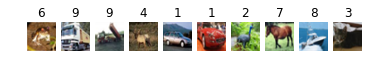

In [18]:
#plt.fiqure(figsize=(12, 2))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i].astype('uint8'), interpolation='spline16')
    plt.title('%d' % y_train[i])
    plt.axis('off')

In [19]:
print(X_test.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(10000,)


In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'track']

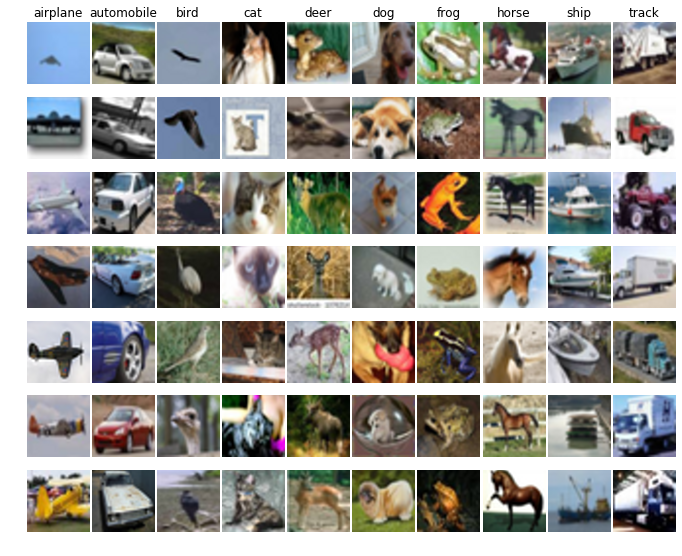

In [23]:
plt.figure(figsize=(10., 8.))
plt.subplots_adjust(0, 0, 0.9, 0.9, wspace=0.05, hspace=0.05)
samples_per_class = 7
num_classes = len(class_names)
for c, class_name in enumerate(class_names):
    idxes = np.flatnonzero(y_train == c)
    samples_idxes = np.random.choice(idxes, samples_per_class, replace=False)
    for i, idx in enumerate(samples_idxes):
        plt_idx = i * num_classes + c + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype(np.uint8), interpolation='spline16')
        plt.axis('off')
        if i == 0:
            plt.title(class_names[c])

In [24]:
x = np.array([
    [1, 2],
    [3, 4]
])
print(x)

[[1 2]
 [3 4]]


In [26]:
for func in [x.min, x.max, x.sum, x.prod, x.mean, x.std, x.var]:
        print(func.__name__, '=', func())

min = 1
max = 4
sum = 10
prod = 24
mean = 2.5
std = 1.118033988749895
var = 1.25


In [28]:
print(np.sum(x))
print(np.sum(x, axis=0))
print(np.sum(x, axis=1))

10
[4 6]
[3 7]


In [29]:
print(np.mean(x))
print(np.mean(x, axis=0))
print(np.mean(x, axis=1))

2.5
[2. 3.]
[1.5 3.5]


In [30]:
print(np.std(x))          # Compute std of all elements
print(np.std(x, axis=0))  # Compute std of each column
print(np.std(x, axis=1))  # Compute std of each row

1.118033988749895
[1. 1.]
[0.5 0.5]


In [33]:
x = np.arange(5).reshape(1, 1, 5) # A 3d array
print(x)

[[[0 1 2 3 4]]]


In [34]:
y = np.array([10, 20, 30, 40, 50])
print(y)

[10 20 30 40 50]


In [35]:
print(x.ndim)
print(y.ndim)

3
1


In [36]:
print(x + y)

[[[10 21 32 43 54]]]


In [39]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
v = np.array([1, 0, -1])

y = np.empty_like(x)

for i in range(4):
    y[i, :] = x[i, :] + v
    
print(y)
    

[[ 2  2  2]
 [ 5  5  5]
 [ 8  8  8]
 [11 11 11]]


In [40]:
print(x < 25)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [41]:
print(x[x < 25])

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [42]:
A = np.full((3, 4), 1.0)
print(A)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [43]:
B = np.full((3, 4), 2.0)
C = np.full((3, 4), 3.0)



In [44]:
D = np.vstack((A, B, C))
print(D)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]]


In [45]:
E = np.hstack((A, B, C))
print(E)

[[1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3.]
 [1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3.]
 [1. 1. 1. 1. 2. 2. 2. 2. 3. 3. 3. 3.]]


In [47]:
F = np.concatenate((A, B, C), axis=0)
print(F)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]
 [3. 3. 3. 3.]]


In [48]:
T = np.stack((A, B))
print(T)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[2. 2. 2. 2.]
  [2. 2. 2. 2.]
  [2. 2. 2. 2.]]]


In [49]:
A = np.arange(24).reshape(4, 2, 3)
print(A)

[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]]]


In [51]:
B = A.transpose((1, 2, 0))
print(B)

[[[ 0  6 12 18]
  [ 1  7 13 19]
  [ 2  8 14 20]]

 [[ 3  9 15 21]
  [ 4 10 16 22]
  [ 5 11 17 23]]]


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
%matplotlib inline

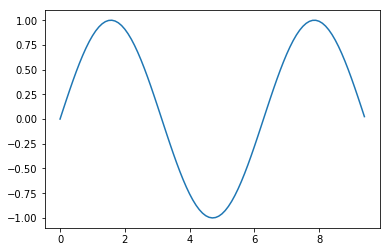

In [55]:
x = np.arange(0, 3 * np.pi, 0.1)
y1 = np.sin(x)

plt.plot(x, y1);

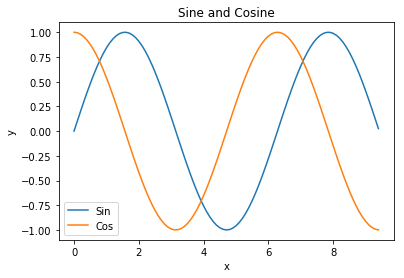

In [57]:
y2 = np.cos(x)

plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine and Cosine')
plt.legend(['Sin', 'Cos']);

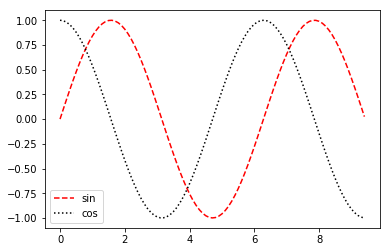

In [63]:
plt.plot(x, y1, 'r--', x, y2, 'k:')
plt.legend(['sin', 'cos']);


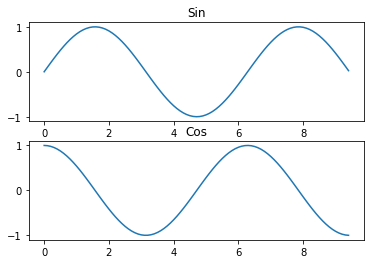

In [72]:
x = np.arange(0, 3 * np.pi, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)
plt.subplot(2, 1, 1)

plt.subplot(2, 1, 1)
plt.plot(x, y1)
plt.title('Sin')

plt.subplot(2, 1, 2)
plt.plot(x, y2)
plt.title('Cos')

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

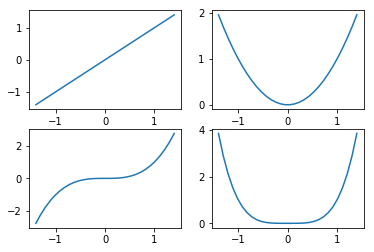

In [75]:
x = np.linspace(-1.4, 1.4, 30)
plt.subplot(2, 2, 1)
plt.plot(x, x)

plt.subplot(2, 2, 2)
plt.plot(x, x**2)

plt.subplot(2, 2, 3)
plt.plot(x, x**3)


plt.subplot(2, 2, 4)
plt.plot(x, x**4)

plt.show

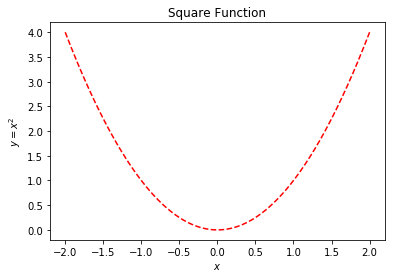

In [76]:
x = np.linspace(-2, 2, 500)
y = x ** 2
plt.plot(x, y, 'r--')
plt.xlabel('$x$')
plt.ylabel('$y = x^2$')
plt.title('Square Function')
plt.savefig('x2.png')

In [78]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

Text(0, 1.5, 'Square function\n$y = x^2$')

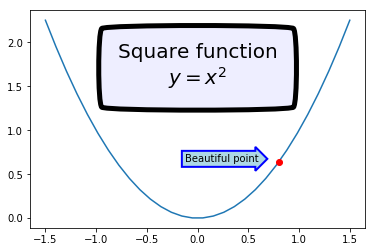

In [80]:
plt.plot(x, x**2, px, py, "ro")

bbox_props = dict(boxstyle="rarrow,pad=0.3", ec="b", lw=2, fc="lightblue")
plt.text(px-0.2, py, "Beautiful point", bbox=bbox_props, ha="right")

bbox_props = dict(boxstyle="round4,pad=1,rounding_size=0.2", ec="black", fc="#EEEEFF", lw=5)
plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=20, color='black', ha="center", bbox=bbox_props)

In [81]:
from sklearn.datasets import load_iris
iris = load_iris()

In [82]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [83]:
print(iris.data.shape)

(150, 4)


In [85]:
n_samples, n_features = iris.data.shape
print('Number of samples: %d' %n_samples)
print('Number of features: %d' %n_features)

Number of samples: 150
Number of features: 4


In [88]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


In [89]:
print(iris.target.shape)

(150,)


In [91]:
print(iris.target.shape)

(150,)


In [92]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [93]:
print(np.unique(iris.target, return_counts=True))

(array([0, 1, 2]), array([50, 50, 50]))


In [94]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [95]:
plt.rcParams['figure.figsize'] = (10, 6)

<function matplotlib.pyplot.show(*args, **kw)>

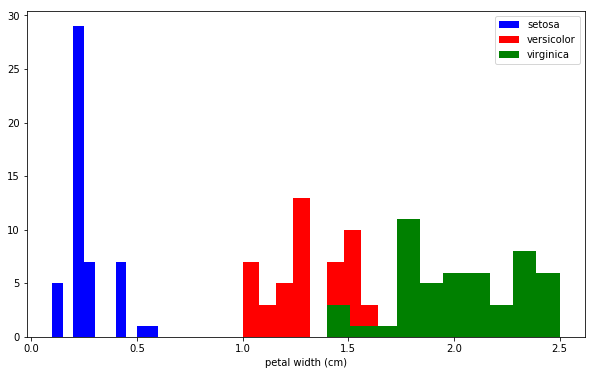

In [96]:
x_index = 3
colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.hist(iris.data[iris.target==label, x_index], label=iris.target_names[label], color=color)
    
plt.xlabel(iris.feature_names[x_index])
plt.legend(loc='upper right')
plt.show

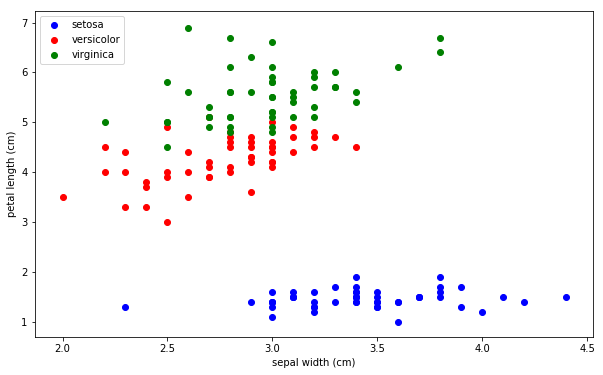

In [102]:
x1_index = 1
x2_index = 2

colors = ['blue', 'red', 'green']

for label, color in zip(range(len(iris.target_names)), colors):
    plt.scatter(iris.data[iris.target==label, x1_index], 
                iris.data[iris.target==label, x2_index],
                label=iris.target_names[label],
                c=color)

plt.xlabel(iris.feature_names[x1_index])
plt.ylabel(iris.feature_names[x2_index])
plt.legend(loc='upper left')
plt.show()


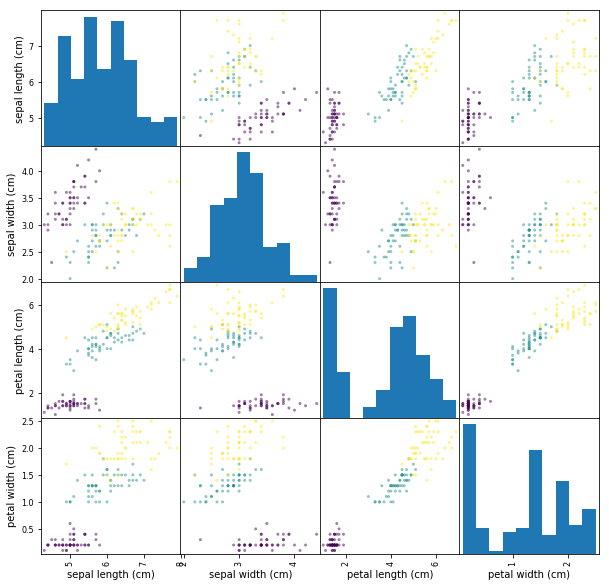

In [103]:
import pandas as pd
    
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(10, 10));

In [104]:
from sklearn.datasets import load_digits
digits = load_digits()

In [105]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [108]:
n_samples, n_features = digits.data.shape
print(n_samples, n_features)

1797 64


In [109]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [4]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
%matplotlib inline

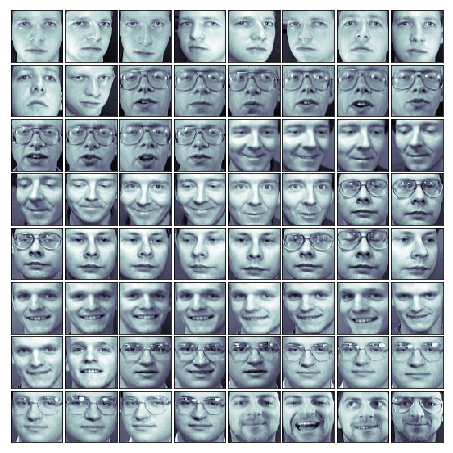

In [5]:
faces = fetch_olivetti_faces()

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone, interpolation='nearest')

In [9]:
X, y = faces.data, faces.target

In [15]:
print(X.shape)
print(y.shape)

(400, 4096)
(400,)


In [16]:
print(y)

[ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19
 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21
 21 21 21 21 22 22 22 22 22 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23
 24 24 24 24 24 24 24 24 24 24 25 25 25 25 25 25 25 25 25 25 26 26 26 26
 26 26 26 26 26 26 27 27 27 27 27 27 27 27 27 27 28 28 28 28 28 28 28 28
 28 28 29 29 29 29 29 29 29 29 29 29 30 30 30 30 30 30 30 30 30 30 31 31
 31 31 31 31 31 31 31 31 32 32 32 32 32 32 32 32 32

In [6]:
from sklearn.neural_network import MLPClassifier

In [19]:
clf = MLPClassifier()

In [20]:
clf.fit(X, y)

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [21]:
y_pred = clf.predict(X)

In [15]:
import numpy as np

accuracy = 100.0 * np.mean(y_pred == y)
print("accuracy = %.2f" % accuracy)

accuracy = 0.00


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


In [1]:
from sklearn.model_selection import train_test_splitin_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)







In [12]:
print("Number of training data: %d" % X_train.shape[0])
print("Number of test data: %d" % X_test.shape[0])

Number of training data: 300
Number of test data: 100


In [13]:
clf = MLPClassifier(hidden_layer_sizes=(100, 100), verbose=True, max_iter=300)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Iteration 1, loss = 3.79767281
Iteration 2, loss = 3.81606321
Iteration 3, loss = 3.73245420
Iteration 4, loss = 3.71876899
Iteration 5, loss = 3.64832170
Iteration 6, loss = 3.61471214
Iteration 7, loss = 3.55827019
Iteration 8, loss = 3.53568913
Iteration 9, loss = 3.50638583
Iteration 10, loss = 3.48631216
Iteration 11, loss = 3.44456469
Iteration 12, loss = 3.40052824
Iteration 13, loss = 3.35301060
Iteration 14, loss = 3.29861553
Iteration 15, loss = 3.24745071
Iteration 16, loss = 3.20102433
Iteration 17, loss = 3.14957873
Iteration 18, loss = 3.09464658
Iteration 19, loss = 3.03112660
Iteration 20, loss = 2.97070078
Iteration 21, loss = 2.90070315
Iteration 22, loss = 2.84010198
Iteration 23, loss = 2.77597618
Iteration 24, loss = 2.71703016
Iteration 25, loss = 2.63324996
Iteration 26, loss = 2.58281089
Iteration 27, loss = 2.48851612
Iteration 28, loss = 2.42232824
Iteration 29, loss = 2.35385514
Iteration 30, loss = 2.27813094
Iteration 31, loss = 2.20793656
Iteration 32, los

Iteration 252, loss = 0.02028122
Iteration 253, loss = 0.02019603
Iteration 254, loss = 0.02002615
Iteration 255, loss = 0.01971711
Iteration 256, loss = 0.01945049
Iteration 257, loss = 0.01944848
Iteration 258, loss = 0.01937584
Iteration 259, loss = 0.01906161
Iteration 260, loss = 0.01888898
Iteration 261, loss = 0.01883193
Iteration 262, loss = 0.01857585
Iteration 263, loss = 0.01834520
Iteration 264, loss = 0.01814833
Iteration 265, loss = 0.01809519
Iteration 266, loss = 0.01784702
Iteration 267, loss = 0.01761777
Iteration 268, loss = 0.01763393
Iteration 269, loss = 0.01737010
Iteration 270, loss = 0.01710749
Iteration 271, loss = 0.01732313
Iteration 272, loss = 0.01704188
Iteration 273, loss = 0.01673801
Iteration 274, loss = 0.01668142
Iteration 275, loss = 0.01655241
Iteration 276, loss = 0.01635102
Iteration 277, loss = 0.01613294
Iteration 278, loss = 0.01600627
Iteration 279, loss = 0.01585419
Iteration 280, loss = 0.01571620
Iteration 281, loss = 0.01561380
Iteration 

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
print("accuracy = %.2f" % (100.0 * np.mean(y_pred == y_test)))

accuracy = 89.00


In [17]:
from sklearn.metrics import accuracy_score
print("accuray = %.2f" % accuracy_score(y_test, y_pred))

accuray = 0.89
